## compare sqrt, Log, BoxCox

In [22]:
import os

if not os.path.exists("raw_data"):
    os.makedirs("raw_data")

!curl -o raw_data/airline_passengers.csv https://lazyprogrammer.me/course_files/airline_passengers.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0curl: (6) Could not resolve host: lazyprogrammer.me


In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from scipy.stats import boxcox

In [24]:
data = pd.read_csv("raw_data/airline_passengers.csv", index_col="Month", parse_dates=True)
data.head()

,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


<Axes: xlabel='Month'>

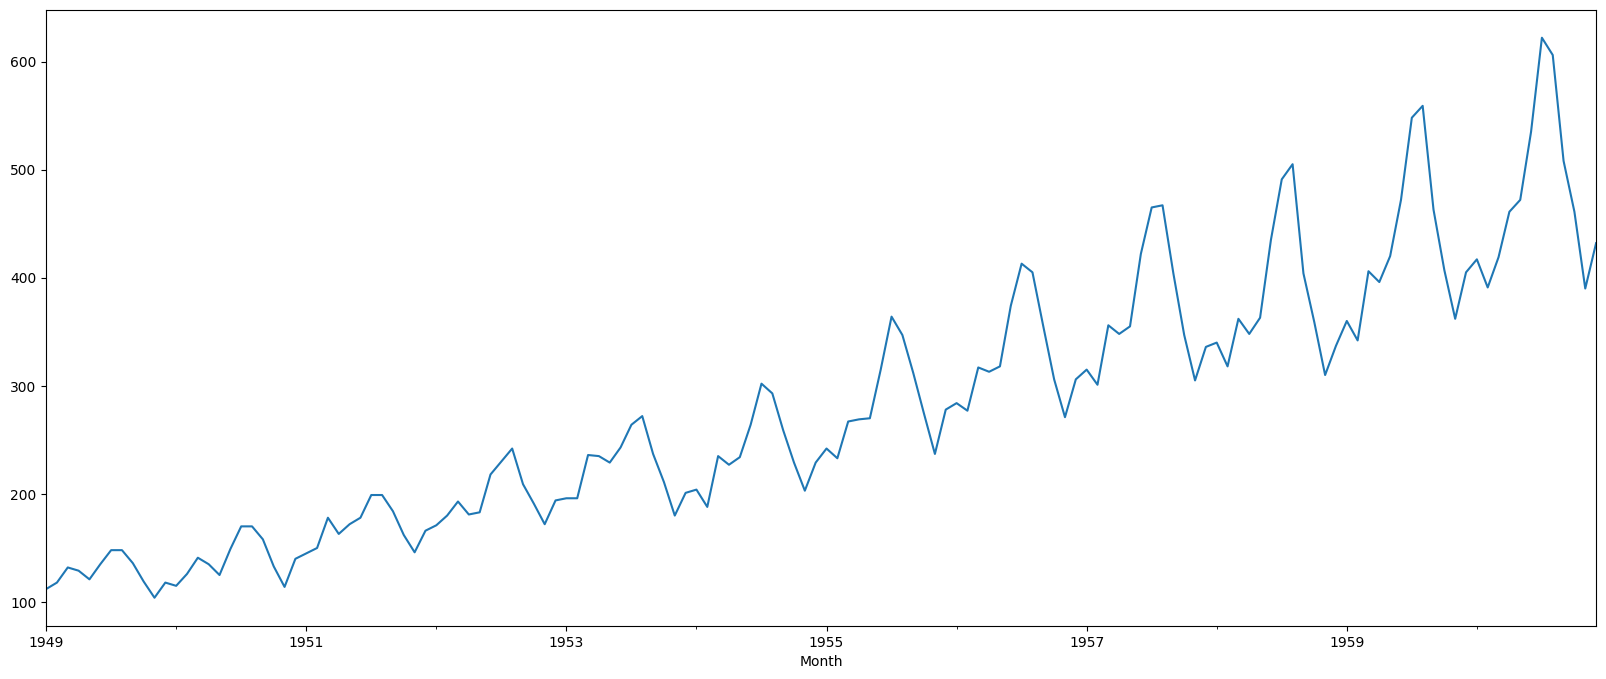

In [25]:
data["Passengers"].plot(figsize=(20, 8))

<Axes: xlabel='Month'>

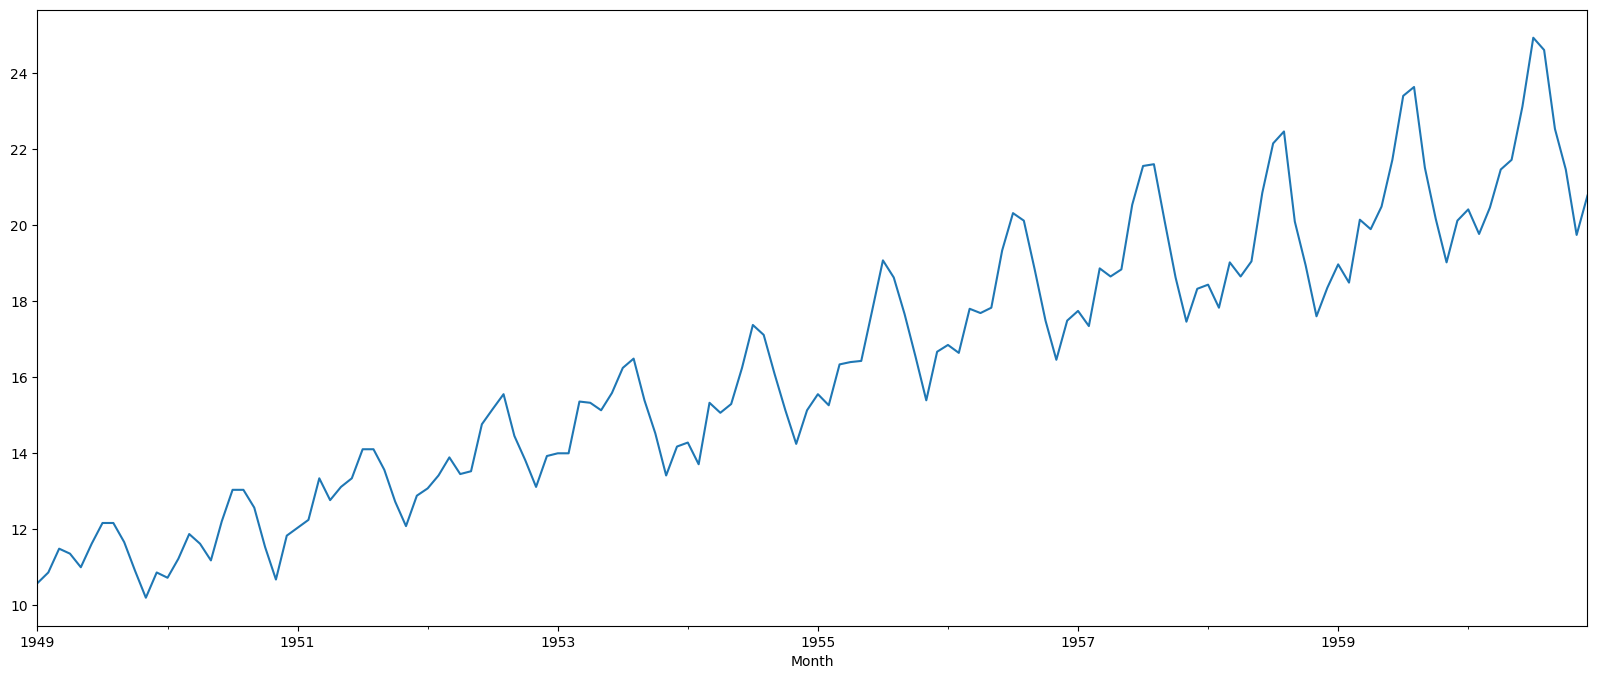

In [26]:
data["SqrtPassengers"] = np.sqrt(data["Passengers"])
data["SqrtPassengers"].plot(figsize=(20, 8))

<Axes: xlabel='Month'>

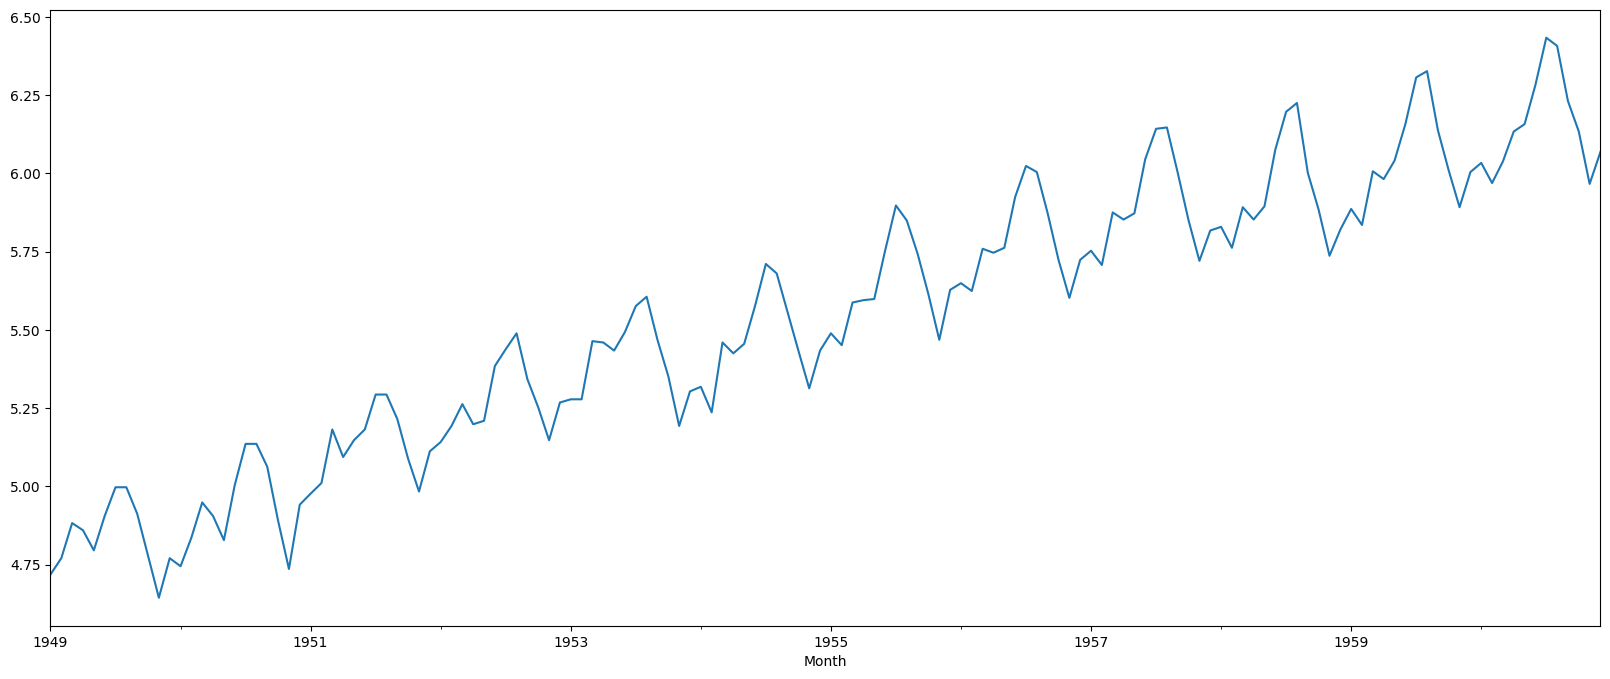

In [27]:
data["LogPassengers"] = np.log(data["Passengers"])
data["LogPassengers"].plot(figsize=(20, 8))

lambda is 0.1480226277556817


<Axes: xlabel='Month'>

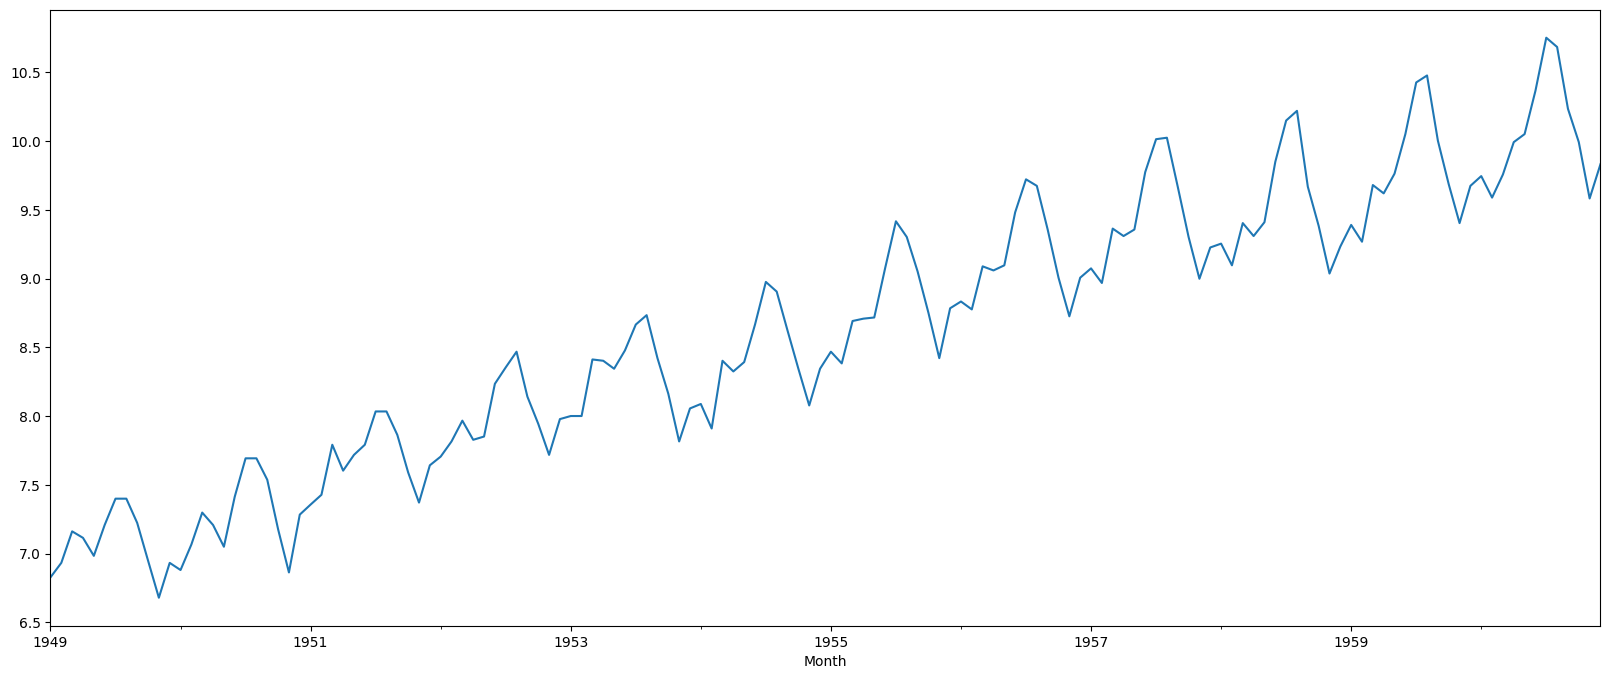

In [28]:
data["BoxCoxPassengers"], lam = boxcox(data["Passengers"])
print(f"lambda is {lam}")
data["BoxCoxPassengers"].plot(figsize=(20, 8))

<Axes: >

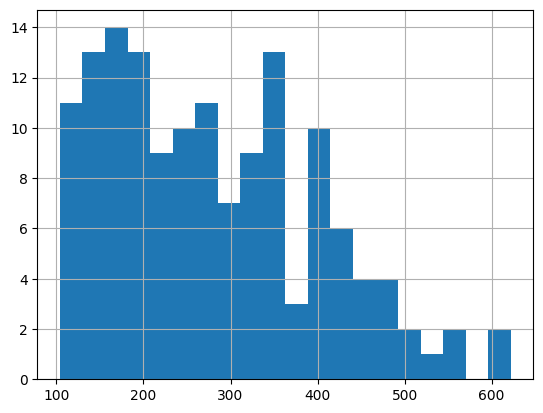

In [29]:
data["Passengers"].hist(bins=20)

<Axes: >

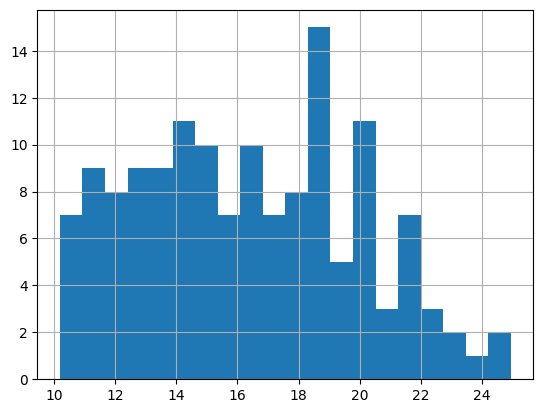

In [30]:
data["SqrtPassengers"].hist(bins=20)

<Axes: >

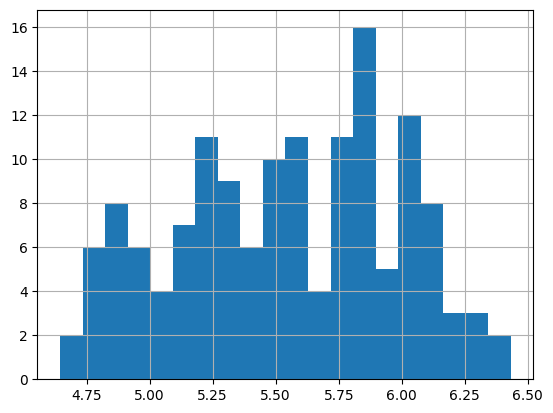

In [31]:
data["LogPassengers"].hist(bins=20)

<Axes: >

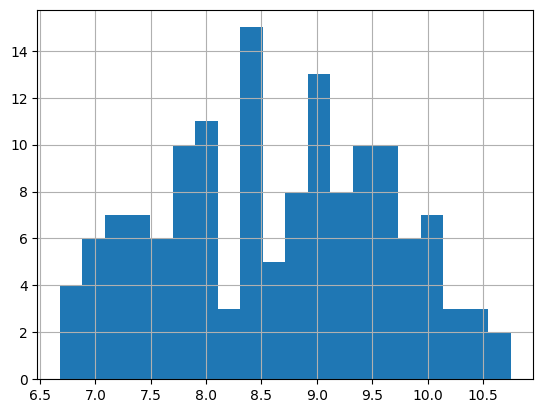

In [32]:
data["BoxCoxPassengers"].hist(bins=20)

## Price Simulation

In [33]:
import numpy as np
import matplotlib.pyplot as plt

In [34]:
# number of time steps
T = 1000

# initial price
p0 = 10

# drift
mu = 0.001


In [35]:
# last log price
last_p = np.log(p0)

log_returns = np.zeros(T)
prices = np.zeros(T)

for t in range(T):
    # sample a log return
    r = 0.01 * np.random.randn()
    p = last_p + mu + r

    # store the return and price
    prices[t] = np.exp(p)
    log_returns[t] = r + mu

    # Assign last p
    last_p = p

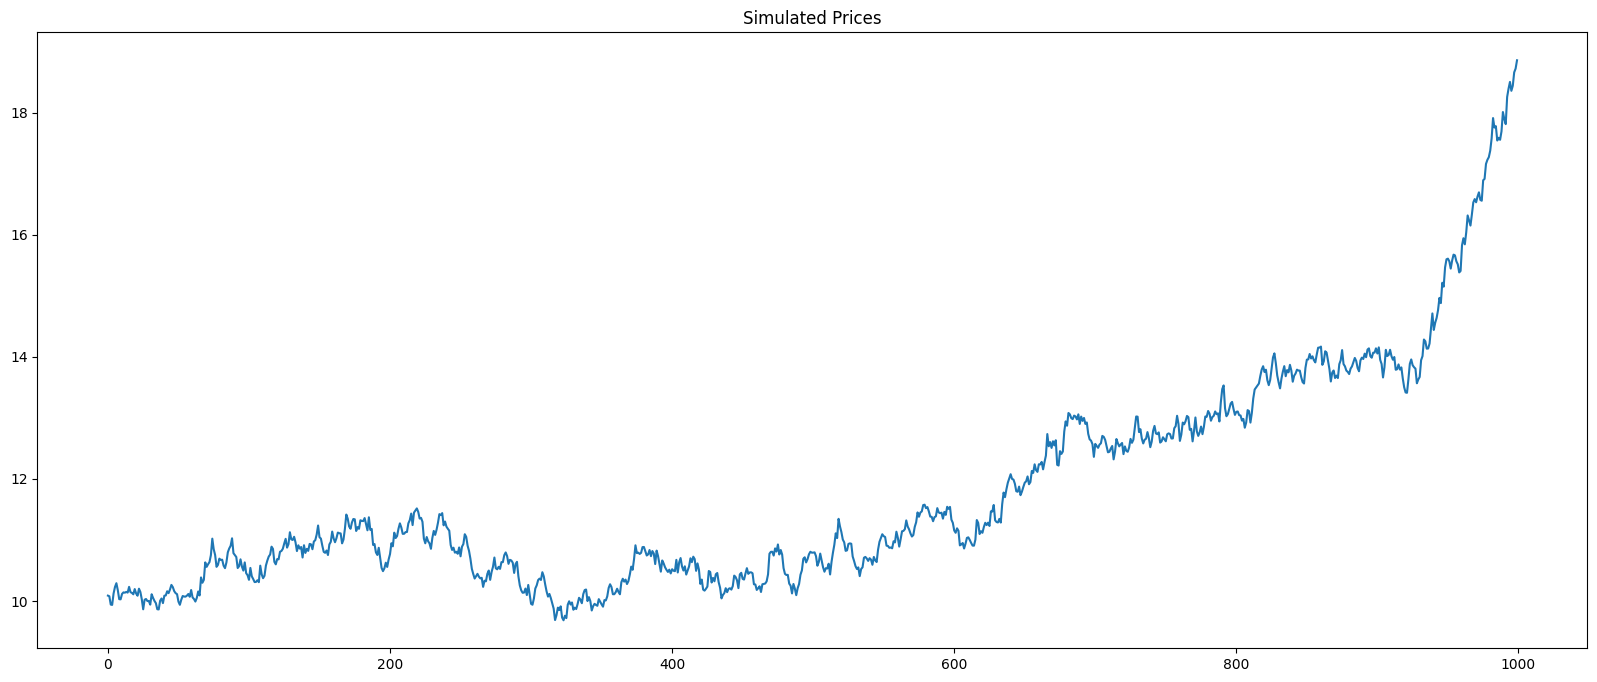

In [36]:
plt.figure(figsize=(20, 8))
plt.plot(prices)
plt.title("Simulated Prices");

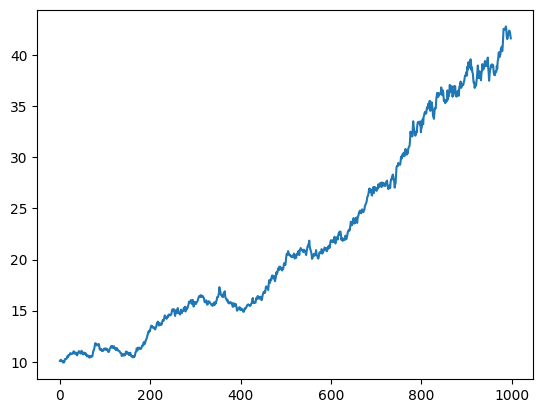

In [37]:
log_returns = np.zeros(T)
prices = np.zeros(T)
prices[0] = np.log(p0)
log_returns = mu + 0.01 * np.random.randn(T)
prices[1:] = np.exp(np.cumsum(log_returns[:-1]) + prices[0])
plt.plot(prices[1:]);

## Naive Forcast

In [38]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [39]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, mean_absolute_percentage_error, \
    root_mean_squared_error

In [40]:
!curl -o raw_data/SPY.csv https://lazyprogrammer.me/course_files/SPY.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0curl: (6) Could not resolve host: lazyprogrammer.me


In [41]:
data = pd.read_csv("raw_data/SPY.csv", index_col="Date", parse_dates=True)
data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,112.370003,113.389999,111.510002,113.330002,92.246048,118944600
2010-01-05,113.260002,113.680000,112.849998,113.629997,92.490204,111579900
2010-01-06,113.519997,113.989998,113.430000,113.709999,92.555328,116074400
2010-01-07,113.500000,114.330002,113.180000,114.190002,92.946060,131091100
2010-01-08,113.889999,114.620003,113.660004,114.570000,93.255348,126402800
...,...,...,...,...,...,...
2018-12-21,246.740005,249.710007,239.979996,240.699997,234.845886,255345600
2018-12-24,239.039993,240.839996,234.270004,234.339996,228.640564,147311600
2018-12-26,235.970001,246.179993,233.759995,246.179993,240.192596,218485400


In [42]:
data["ClosePrediction"] = data["Close"].shift(1)

In [43]:
y_true = data.iloc[1:]["Close"]
y_pred = data.iloc[1:]["ClosePrediction"]

In [44]:
# SSE
(y_true - y_pred).T.dot(y_true - y_pred)

6330.3742894926045

In [45]:
# MSE
mean_squared_error(y_true=y_true, y_pred=y_pred)

2.798573956451196

In [46]:
# RMSE
root_mean_squared_error(y_true=y_true, y_pred=y_pred)

1.672893886787562

In [47]:
# MAE
mean_absolute_error(y_true=y_true, y_pred=y_pred)

1.1457559803120336

In [48]:
# r2
r2_score(y_true=y_true, y_pred=y_pred)

0.9989603259063914

In [49]:
# MAPE
mean_absolute_percentage_error(y_true=y_true, y_pred=y_pred)

0.006494073151422373

In [50]:
# sMAPE
def smape(y_true, y_pred):
    smape = np.mean(np.abs((y_true - y_pred) / ((np.abs(y_true) + np.abs(y_pred)) / 2)))
    return smape


smape(y_true=y_true, y_pred=y_pred)

0.006491365814068417

## SMA

In [51]:
!curl -o raw_data/sp500_close.csv https://lazyprogrammer.me/course_files/sp500_close.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0curl: (6) Could not resolve host: lazyprogrammer.me


In [52]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


In [53]:
data = pd.read_csv("raw_data/sp500_close.csv", index_col=0, parse_dates=True)
data

,AAL,AAPL,AAP,ABBV,ABC,ABT,ACN,ADBE,ADI,ADM,ADP,ADSK,ADS,AEE,AEP,AES,AET,AFL,AGN,AIG,AIV,AIZ,AJG,AKAM,ALB,ALGN,ALK,ALLE,ALL,ALXN,AMAT,AMD,AME,AMGN,AMG,AMP,AMT,AMZN,ANDV,ANSS,...,UTX,VAR,VFC,VIAB,VLO,VMC,VNO,VRSK,VRSN,VRTX,VTR,VZ,V,WAT,WBA,WDC,WEC,WFC,WHR,WLTW,WMB,WMT,WM,WRK,WU,WYNN,WYN,WY,XEC,XEL,XLNX,XL,XOM,XRAY,XRX,XYL,YUM,ZBH,ZION,ZTS
2013-02-08,14.75,67.8542,78.90,36.25,46.89,34.41,73.31,39.12,45.70,30.22,60.925,38.89,154.08,32.61,44.57,11.07,50.60,50.35,87.45,38.79,28.57,38.56,37.97,35.42,62.66,32.73,24.335,NaN,45.14,93.66,13.61,2.59,41.46,86.77,146.45,66.49,77.06,261.95,53.86,74.69,...,90.09,71.10,36.4357,59.28,46.13,56.08,84.51,54.90,45.39,46.00,67.42,44.35,39.4500,92.53,41.40,48.49,40.06,34.88,107.32,NaN,36.00,71.48,36.30,NaN,14.66,126.52,59.89,30.21,66.60,27.84,37.51,28.24,88.61,42.87,31.84,27.09,65.30,75.85,24.14,33.05
2013-02-09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-02-10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-02-11,14.46,68.5614,78.39,35.85,46.76,34.26,73.07,38.64,46.08,30.28,60.340,38.89,153.42,32.84,44.73,11.20,50.38,50.26,86.66,39.45,28.92,38.48,37.88,35.31,62.76,33.03,24.400,NaN,45.25,92.30,13.66,2.67,41.51,84.92,145.57,66.49,76.38,257.21,54.55,74.71,...,89.61,71.11,36.2119,59.31,46.14,55.65,84.80,54.62,45.66,45.70,67.70,44.32,39.0825,92.47,41.48,48.60,40.14,35.26,106.47,NaN,35.74,71.40,36.31,NaN,14.25,124.10,59.62,30.14,66.75,27.94,37.46,28.31,88.28,42.84,31.96,27.46,64.55,75.65,24.21,33.26
2013-02-12,14.27,66.8428,78.60,35.42,46.96,34.30,73.37,38.89,46.27,30.81,60.360,38.91,152.32,33.15,44.90,11.31,50.15,49.50,85.78,38.63,29.16,41.05,37.82,36.74,62.70,33.02,24.430,NaN,45.61,90.21,13.66,2.77,41.82,84.54,145.75,67.49,75.59,258.70,53.49,75.74,...,89.98,71.36,36.3524,59.12,45.65,56.12,85.57,54.23,45.53,45.89,68.16,44.44,39.2000,91.99,41.95,48.18,39.93,35.51,110.81,NaN,35.84,71.40,36.46,NaN,14.34,122.67,59.62,30.31,67.00,28.00,37.58,28.41,88.46,42.87,31.84,27.95,64.75,75.44,24.49,33.74
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-02-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-02-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-02-05,49.76,156.4900,109.86,109.51,91.90,58.73,151.83,190.27,85.40,40.60,114.070,109.18,238.78,54.15,66.48,10.60,180.95,86.21,165.00,60.63,39.67,88.18,66.27,62.81,105.15,242.40,62.740,79.11,95.02,112.72,48.31,11.57,73.90,174.75,188.50,160.39,142.04,1390.00,99.29,156.02,...,127.24,119.62,78.6300,31.14,89.77,125.20,67.58,94.89,108.73,155.14,52.88,50.50,116.2700,203.26,70.43,81.45,61.17,58.16,171.88,157.50,29.48,100.09,81.75,63.96,19.54,165.48,116.77,34.79,107.91,43.63,66.97,37.68,7

In [54]:
goog = data[["GOOG"]].copy().dropna()
goog

,GOOG
2014-03-27,558.46
2014-03-28,559.99
2014-03-31,556.97
2014-04-01,567.16
2014-04-02,567.00
...,...
2018-02-01,1167.70
2018-02-02,1111.90
2018-02-05,1055.80
2018-02-06,1080.60


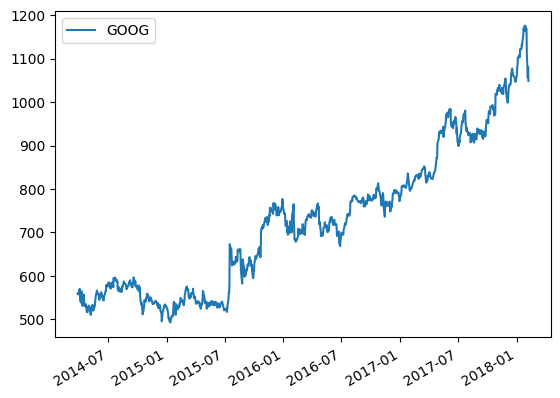

In [55]:
goog.plot();

In [56]:
goog_return = np.log(goog.pct_change(1) + 1)
goog_return

,GOOG
2014-03-27,NaN
2014-03-28,0.002736
2014-03-31,-0.005408
2014-04-01,0.018130
2014-04-02,-0.000282
...,...
2018-02-01,-0.001916
2018-02-02,-0.048966
2018-02-05,-0.051771
2018-02-06,0.023218


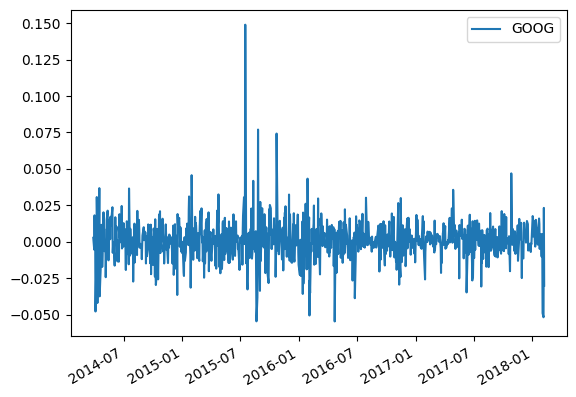

In [57]:
goog_return.plot();

In [58]:
goog["SMA-10"] = goog["GOOG"].rolling(10).mean()
goog.head(20)

,GOOG,SMA-10
2014-03-27,558.46,NaN
2014-03-28,559.99,NaN
2014-03-31,556.97,NaN
2014-04-01,567.16,NaN
2014-04-02,567.00,NaN
2014-04-03,569.74,NaN
2014-04-04,543.14,NaN
2014-04-07,538.15,NaN
2014-04-08,554.90,NaN
2014-04-09,564.14,557.965


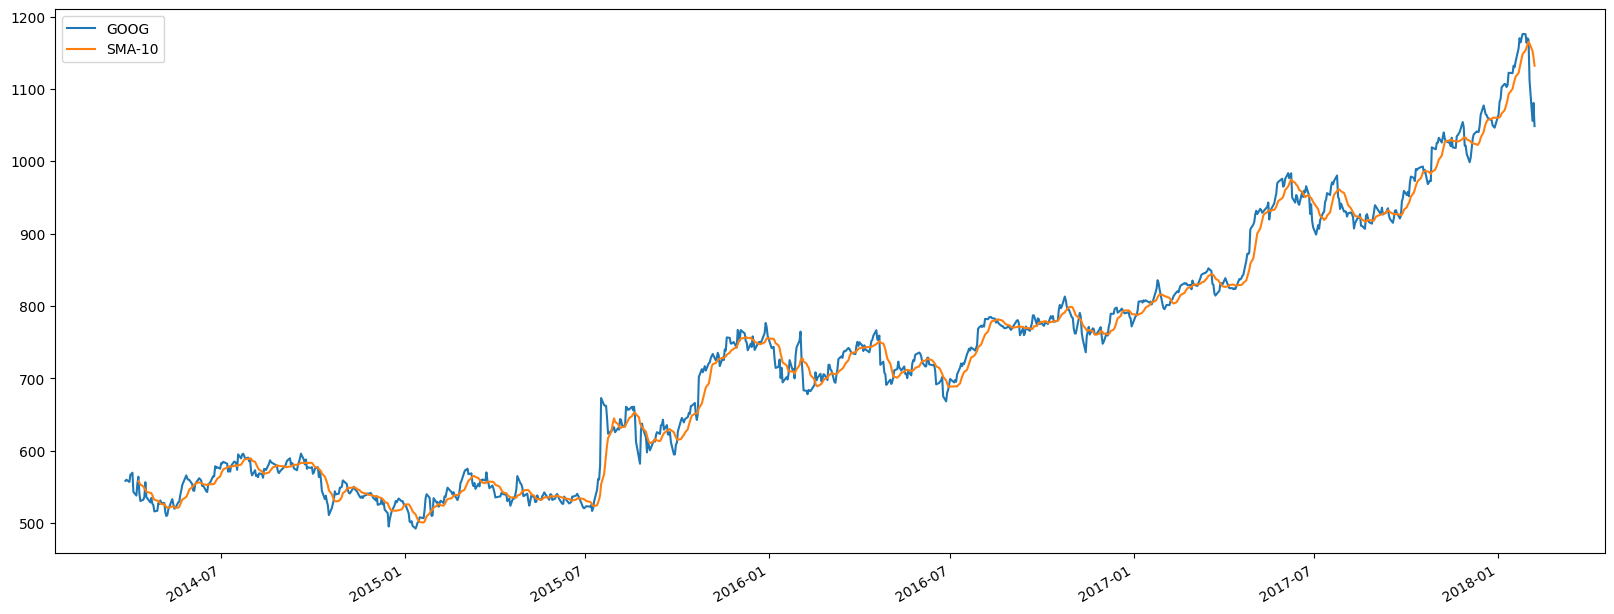

In [59]:
goog.plot(figsize=(20, 8));

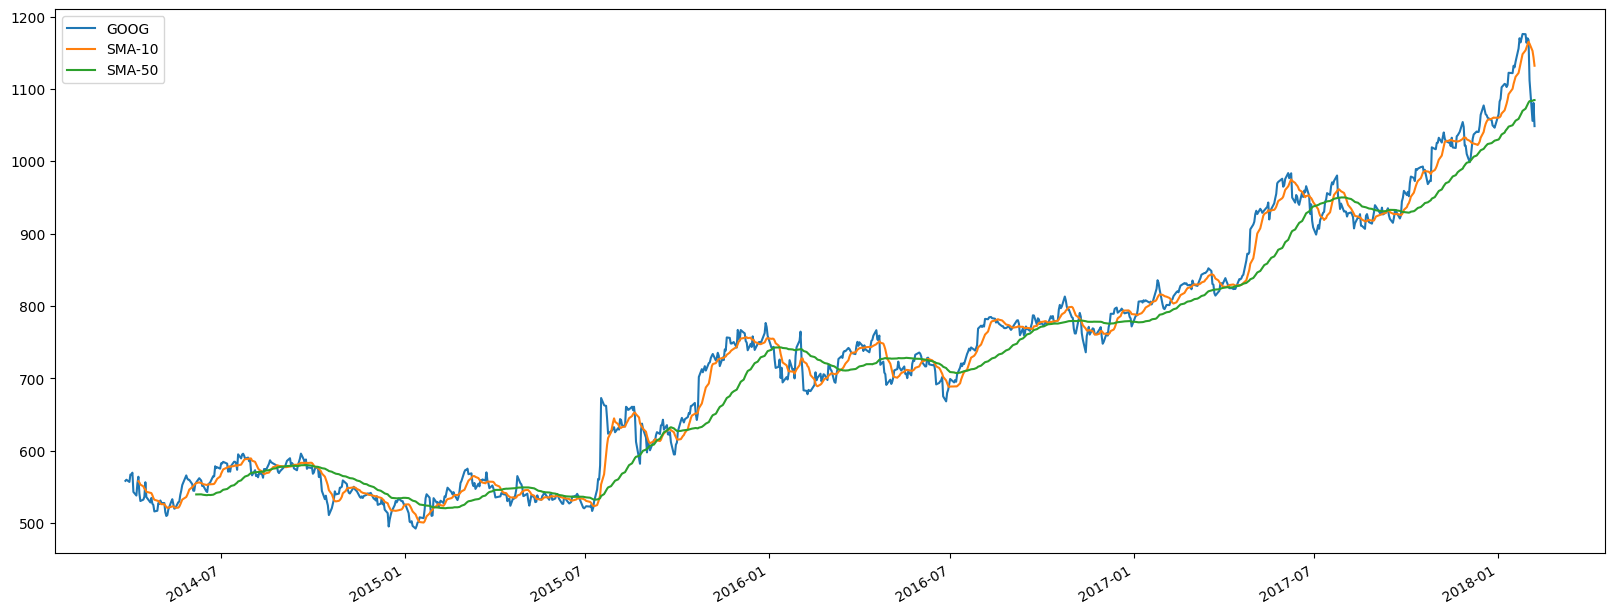

In [60]:
goog["SMA-50"] = goog["GOOG"].rolling(50).mean()
goog.plot(figsize=(20, 8));

In [61]:
goog_aapl = data[["GOOG", "AAPL"]].copy().dropna()
cov = goog_aapl.rolling(50).cov()
cov

GOOG       AAPL
2014-03-27 GOOG          NaN        NaN
           AAPL          NaN        NaN
2014-03-28 GOOG          NaN        NaN
           AAPL          NaN        NaN
2014-03-31 GOOG          NaN        NaN
...                      ...        ...
2018-02-05 AAPL    34.825709  17.568865
2018-02-06 GOOG  2691.756465  38.174468
           AAPL    38.174468  19.121371
2018-02-07 GOOG  2678.778214  49.980378
           AAPL    49.980378  22.052882

[1950 rows x 2 columns]

In [62]:
cov.loc["2018/02/07"]

,GOOG,AAPL
GOOG,2678.778214,49.980378
AAPL,49.980378,22.052882


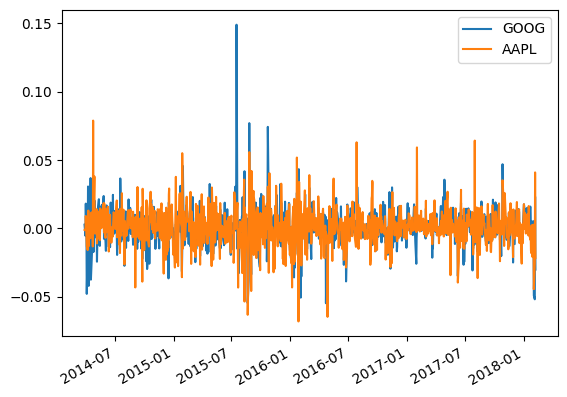

In [63]:
goog_aapl_ret = np.log(1 + goog_aapl.pct_change(1))
goog_aapl_ret.plot();

In [64]:
goog_aapl_ret["GOOG-SMA-50"] = goog_aapl_ret["GOOG"].rolling(50).mean()
goog_aapl_ret["AAPL-SMA-50"] = goog_aapl_ret["AAPL"].rolling(50).mean()

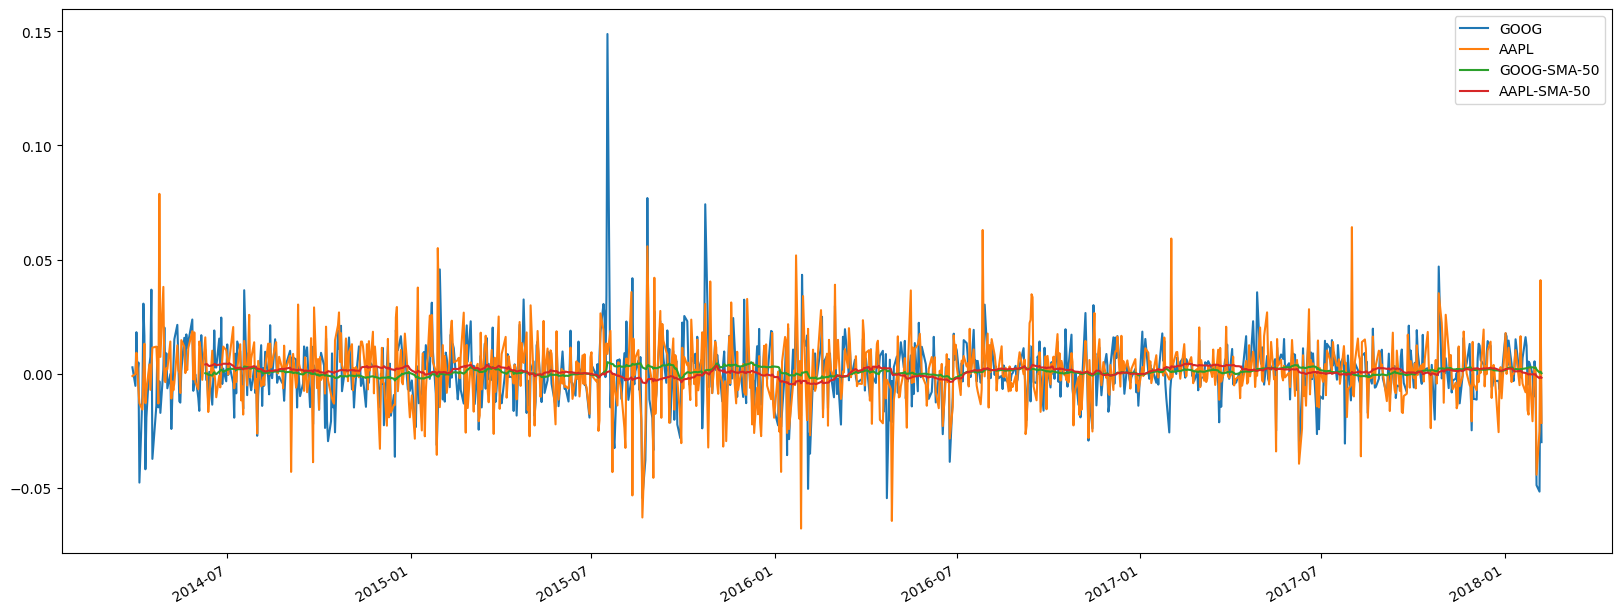

In [65]:
goog_aapl_ret.plot(figsize=(20, 8));

## EWMA

In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [67]:
data = pd.read_csv("raw_data/airline_passengers.csv", index_col="Month", parse_dates=True)
data

,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1960-08-01,606
1960-09-01,508
1960-10-01,461


In [68]:
data.isna().sum()

Passengers    0
dtype: int64

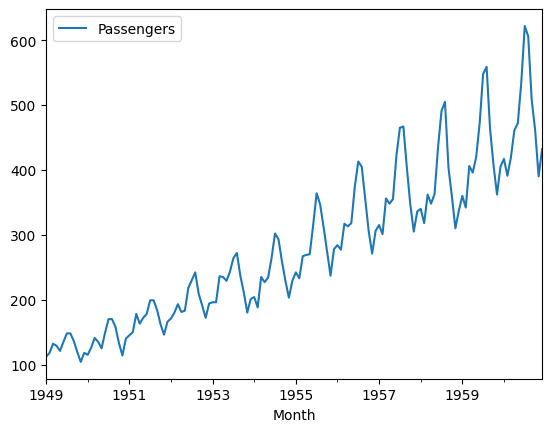

In [69]:
data.plot();

In [70]:
alpha = 0.2

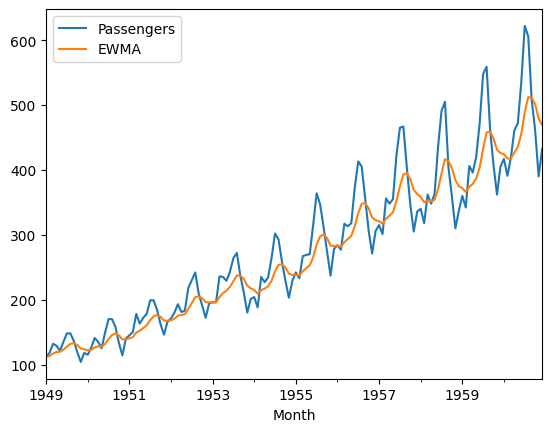

In [71]:
data["EWMA"] = data["Passengers"].ewm(alpha=alpha, adjust=False).mean()
data.plot();

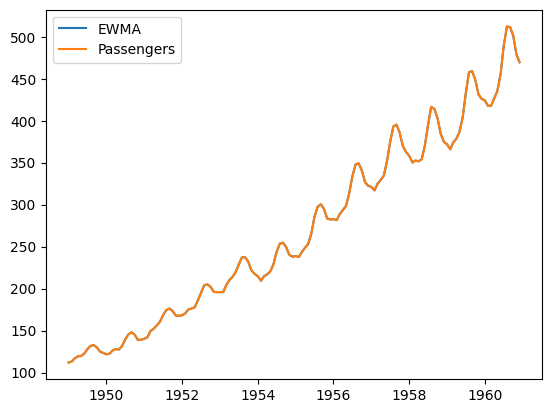

In [72]:
manual_ewma = []
temp = 0
alpha = 0.2
passenger = data["Passengers"].values

for x in data["Passengers"].to_numpy():
    if len(manual_ewma) == 0:
        ewma = x
    else:
        ewma = alpha * x + (1 - alpha) * manual_ewma[-1]

    manual_ewma.append(ewma)

plt.plot(data.index[:], manual_ewma, label="EWMA")
plt.plot(data.index, data["EWMA"], label="Passengers")
plt.legend()
data["Manual"] = manual_ewma

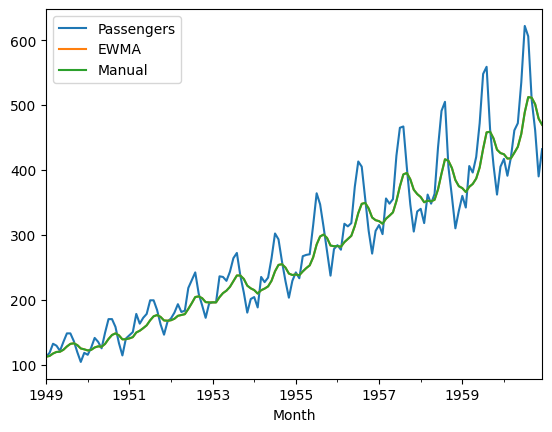

In [73]:
data.plot();

In [74]:
data.drop("Manual", axis=1, inplace=True)

In [75]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing

In [76]:
ses = SimpleExpSmoothing(data["Passengers"])

c:\All Python Projects\Interpreters\in_Machine_Learning\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [77]:
data.index

DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01',
               '1949-05-01', '1949-06-01', '1949-07-01', '1949-08-01',
               '1949-09-01', '1949-10-01',
               ...
               '1960-03-01', '1960-04-01', '1960-05-01', '1960-06-01',
               '1960-07-01', '1960-08-01', '1960-09-01', '1960-10-01',
               '1960-11-01', '1960-12-01'],
              dtype='datetime64[ns]', name='Month', length=144, freq=None)

In [78]:
data.index.freq = "MS"
data.index

DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01',
               '1949-05-01', '1949-06-01', '1949-07-01', '1949-08-01',
               '1949-09-01', '1949-10-01',
               ...
               '1960-03-01', '1960-04-01', '1960-05-01', '1960-06-01',
               '1960-07-01', '1960-08-01', '1960-09-01', '1960-10-01',
               '1960-11-01', '1960-12-01'],
              dtype='datetime64[ns]', name='Month', length=144, freq='MS')

In [79]:
ses = SimpleExpSmoothing(data["Passengers"],
                         initialization_method="legacy-heuristic")

In [80]:
res = ses.fit(smoothing_level=alpha, optimized=False)

In [81]:
res

In [82]:
res.predict(start=data.index[0], end=data.index[-1])

Month
1949-01-01    112.000000
1949-02-01    112.000000
1949-03-01    113.200000
1949-04-01    116.960000
1949-05-01    119.368000
                 ...    
1960-08-01    488.767616
1960-09-01    512.214093
1960-10-01    511.371274
1960-11-01    501.297019
1960-12-01    479.037615
Freq: MS, Length: 144, dtype: float64

In [83]:
data["SES"] = res.predict(start=data.index[0], end=data.index[-1])

In [84]:
np.allclose(data["SES"], res.fittedvalues)

True

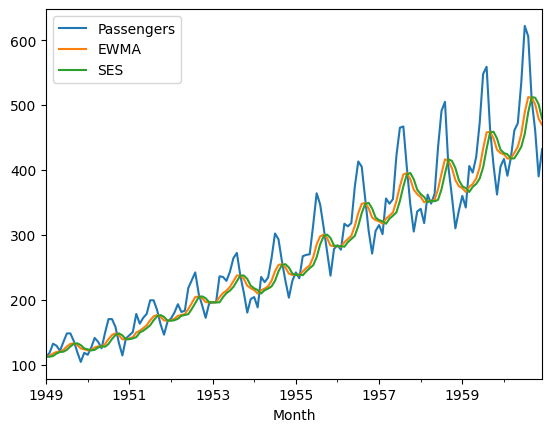

In [85]:
data.plot();

In [86]:
data.head()

,Passengers,EWMA,SES
Month,,,
1949-01-01,112,112.0000,112.000
1949-02-01,118,113.2000,112.000
1949-03-01,132,116.9600,113.200
1949-04-01,129,119.3680,116.960
1949-05-01,121,119.6944,119.368


In [87]:
data["SES-1"] = data["SES"].shift(-1)

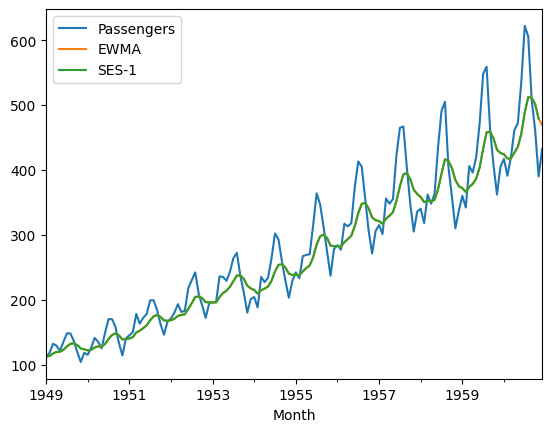

In [90]:
data[["Passengers", "EWMA", "SES-1"]].plot();


In [91]:
N_test = 12
train = data.iloc[:-N_test]
test = data.iloc[-N_test:]

In [119]:
ses = SimpleExpSmoothing(train["Passengers"],
                         initialization_method="legacy-heuristic")
res = ses.fit()

In [120]:
train_idx = data.index <= train.index[-1]
test_idx = data.index > train.index[-1]

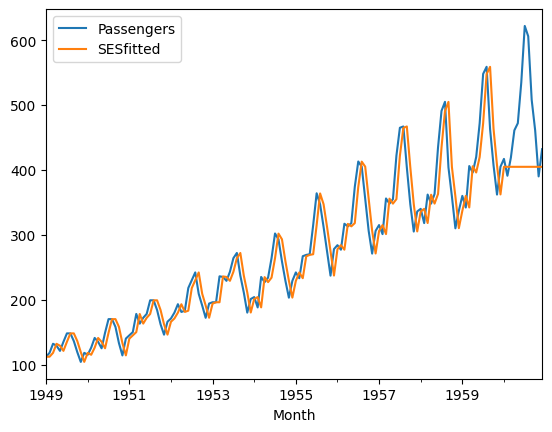

In [121]:
data.loc[train_idx, "SESfitted"] = res.fittedvalues
data.loc[test_idx, "SESfitted"] = res.forecast(N_test)
data[["Passengers", "SESfitted"]].plot();

In [122]:
res.params

{'smoothing_level': 0.995,
 'smoothing_trend': nan,
 'smoothing_seasonal': nan,
 'damping_trend': nan,
 'initial_level': 112.0,
 'initial_trend': nan,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

## Holt-Winters

In [123]:
from statsmodels.tsa.holtwinters import Holt

In [124]:
holt = Holt(data["Passengers"],
            initialization_method="legacy-heuristic")


In [125]:
res_h = holt.fit()

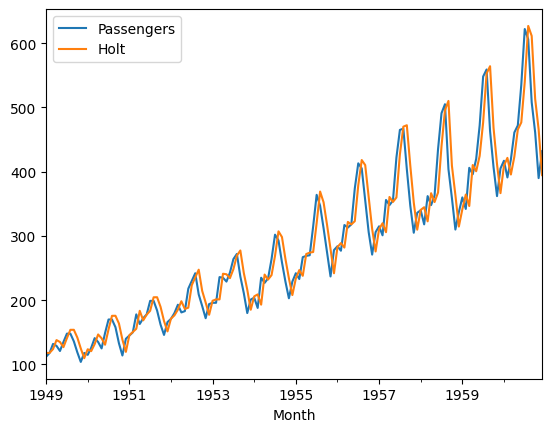

In [128]:
data["Holt"] = res_h.fittedvalues
data[["Passengers", "Holt"]].plot();

In [132]:
holt = Holt(train["Passengers"], initialization_method="legacy-heuristic")
res_h = holt.fit()
data.loc[train_idx, "Holt"] = res_h.fittedvalues
data.loc[test_idx, "Holt"] = res_h.forecast(N_test)

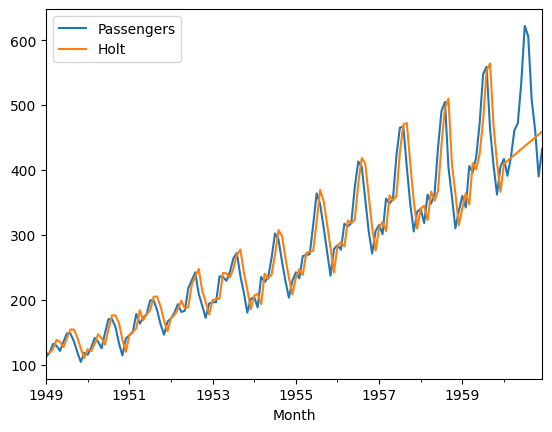

In [135]:
data[["Passengers", "Holt"]].plot();

In [136]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [137]:
hw = ExponentialSmoothing(train["Passengers"],
                          initialization_method="legacy-heuristic",
                          trend="add", seasonal="add", seasonal_periods=12)
res_hw = hw.fit()

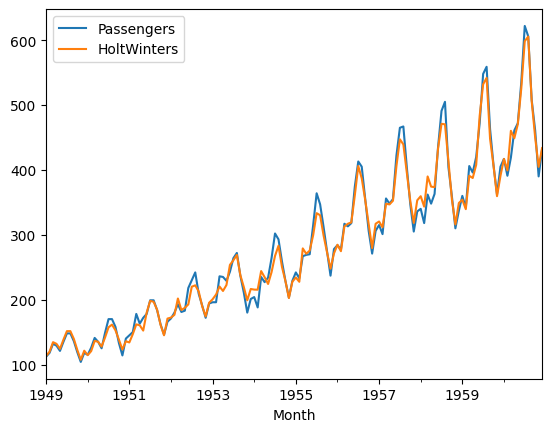

In [138]:
data.loc[train_idx, "HoltWinters"] = res_hw.fittedvalues
data.loc[test_idx, "HoltWinters"] = res_hw.forecast(N_test)
data[["Passengers", "HoltWinters"]].plot();

In [148]:
def rmse(y, t):
    return np.sqrt(np.mean((y - t) ** 2))


def mae(y, t):
    return np.mean(np.abs(y - t))


In [149]:
print(f"Train RMSE: {rmse(train['Passengers'], res_hw.fittedvalues)}")
print(f"Test RMSE: {rmse(test['Passengers'], res_hw.forecast(N_test))}")

print(f"Train MAE: {mae(train['Passengers'], res_hw.fittedvalues)}")
print(f"Test MAE: {mae(test['Passengers'], res_hw.forecast(N_test))}")

Train RMSE: 11.853000976828765
Test RMSE: 15.543003084126884
Train MAE: 8.892127530485896
Test MAE: 10.43776563928059


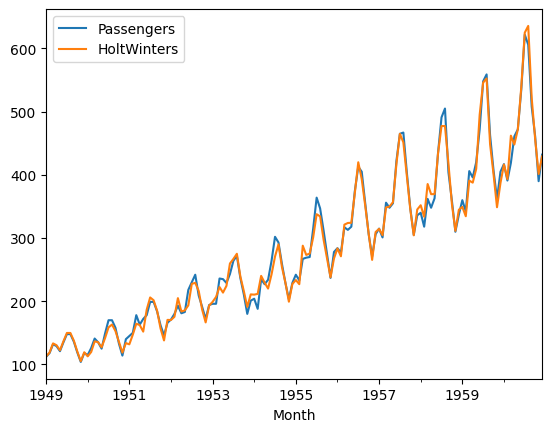

In [150]:
hw = ExponentialSmoothing(train["Passengers"],
                          initialization_method="legacy-heuristic",
                          trend="add", seasonal="mul", seasonal_periods=12)
res_hw = hw.fit()
data.loc[train_idx, "HoltWinters"] = res_hw.fittedvalues
data.loc[test_idx, "HoltWinters"] = res_hw.forecast(N_test)
data[["Passengers", "HoltWinters"]].plot();


In [151]:
print(f"Train RMSE: {rmse(train['Passengers'], res_hw.fittedvalues)}")
print(f"Test RMSE: {rmse(test['Passengers'], res_hw.forecast(N_test))}")

print(f"Train MAE: {mae(train['Passengers'], res_hw.fittedvalues)}")
print(f"Test MAE: {mae(test['Passengers'], res_hw.forecast(N_test))}")

Train RMSE: 10.153934838980392
Test RMSE: 16.535212108255575
Train MAE: 7.552052605073941
Test MAE: 10.683341165983848


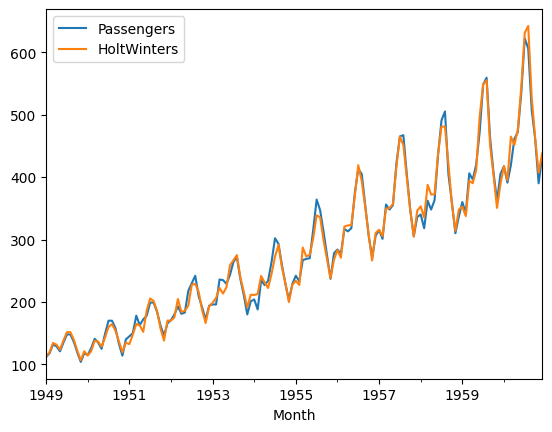

In [152]:
hw = ExponentialSmoothing(train["Passengers"],
                          initialization_method="legacy-heuristic",
                          trend="mul", seasonal="mul", seasonal_periods=12)
res_hw = hw.fit()
data.loc[train_idx, "HoltWinters"] = res_hw.fittedvalues
data.loc[test_idx, "HoltWinters"] = res_hw.forecast(N_test)
data[["Passengers", "HoltWinters"]].plot();


In [153]:
print(f"Train RMSE: {rmse(train['Passengers'], res_hw.fittedvalues)}")
print(f"Test RMSE: {rmse(test['Passengers'], res_hw.forecast(N_test))}")

print(f"Train MAE: {mae(train['Passengers'], res_hw.fittedvalues)}")
print(f"Test MAE: {mae(test['Passengers'], res_hw.forecast(N_test))}")

Train RMSE: 9.887178133858725
Test RMSE: 19.102067803628128
Train MAE: 7.4087084537494965
Test MAE: 13.450486213258506


## Walk-Forward Validation

In [1]:
import pandas as pd
import numpy as np
import itertools
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.holtwinters import ExponentialSmoothing


In [2]:
data = pd.read_csv("raw_data/airline_passengers.csv", index_col="Month", parse_dates=True)
data.index.freq = "MS"

In [3]:
data.shape

(144, 1)

In [4]:
h = 12
steps = 10
Ntest = len(data) - h - steps + 1
Ntest

123

In [5]:
trend_type_list = ["add", "mul"]
seasonal_type_list = ["add", "mul"]
damped_trend_list = [True, False]
init_method_list = ["estimated", "heuristic", "legacy-heuristic"]
use_boxcox_list = [True, False, 0]

In [13]:
def walk_forward(trend_type,
                 seasonal_type,
                 damped_type,
                 init_method,
                 use_boxcox,
                 debug=False):
    # store_error
    errors = []
    seen_last = False
    steps_completed = 0

    for end_of_train in range(Ntest, len(data) - h + 1):
        train = data.iloc[:end_of_train]
        test = data.iloc[end_of_train:end_of_train + h]

        if test.index[-1] == data.index[-1]:
            seen_last = True

        steps_completed += 1

        hw = ExponentialSmoothing(train["Passengers"],
                                  initialization_method=init_method,
                                  trend=trend_type,
                                  seasonal=seasonal_type,
                                  seasonal_periods=12,
                                  damped_trend=damped_type,
                                  use_boxcox=use_boxcox)
        res_hw = hw.fit()

        fcast = res_hw.forecast(h)
        error = mean_squared_error(test["Passengers"], fcast)
        errors.append(error)

    if debug:
        print("seen last:", seen_last)
        print("steps completed:", steps_completed)

    return np.mean(errors)




In [14]:
walk_forward("add", "add", False, "legacy-heuristic", 0, debug=True)

seen last: True
steps completed: 10


1448.5344452151644

In [16]:
tuple_of_option_lists = (trend_type_list,
                         seasonal_type_list,
                         damped_trend_list,
                         init_method_list,
                         use_boxcox_list)
for x in itertools.product(*tuple_of_option_lists):
    print(x)

('add', 'add', True, 'estimated', True)
('add', 'add', True, 'estimated', False)
('add', 'add', True, 'estimated', 0)
('add', 'add', True, 'heuristic', True)
('add', 'add', True, 'heuristic', False)
('add', 'add', True, 'heuristic', 0)
('add', 'add', True, 'legacy-heuristic', True)
('add', 'add', True, 'legacy-heuristic', False)
('add', 'add', True, 'legacy-heuristic', 0)
('add', 'add', False, 'estimated', True)
('add', 'add', False, 'estimated', False)
('add', 'add', False, 'estimated', 0)
('add', 'add', False, 'heuristic', True)
('add', 'add', False, 'heuristic', False)
('add', 'add', False, 'heuristic', 0)
('add', 'add', False, 'legacy-heuristic', True)
('add', 'add', False, 'legacy-heuristic', False)
('add', 'add', False, 'legacy-heuristic', 0)
('add', 'mul', True, 'estimated', True)
('add', 'mul', True, 'estimated', False)
('add', 'mul', True, 'estimated', 0)
('add', 'mul', True, 'heuristic', True)
('add', 'mul', True, 'heuristic', False)
('add', 'mul', True, 'heuristic', 0)
('add

In [ ]:
best_score = float("inf")
best_options = None
for x in itertools.product(*tuple_of_option_lists):
    score = walk_forward(*x)
    if score < best_score:
        print("Best score so far:", score)
        best_score = score
        best_options = x

In [21]:
print(f"best score is: {best_score}")
trend_type, seasonal_type, damped_trend, init_method, use_boxcox = best_options
print(f"trend type: {trend_type}")
print(f"seasonal type: {seasonal_type}")
print(f"damped trend: {damped_trend}")
print(f"initialization method: {init_method}")
print(f"use boxcox: {use_boxcox}")

best score is: 249.57507607273482
trend type: mul
seasonal type: add
damped trend: False
initialization method: legacy-heuristic
use boxcox: False


## Full Example

In [2]:
!curl -o raw_data/raperrin-freres-monthly-champagne.csv https://lazyprogrammer.me/course_files/timeseries/perrin-freres-monthly-champagne.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100  1598  100  1598    0     0    929      0  0:00:01  0:00:01 --:--:--   930
100  1598  100  1598    0     0    929      0  0:00:01  0:00:01 --:--:--   930


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.metrics import r2_score

In [6]:
data = pd.read_csv("raw_data/raperrin-freres-monthly-champagne.csv", index_col="Month", parse_dates=True, skipfooter=2)
data.columns = ["sales"]
data.index.freq = "MS"
data

C:\Users\keipj\AppData\Local\Temp\ipykernel_13264\4089267397.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  data = pd.read_csv("raw_data/raperrin-freres-monthly-champagne.csv", index_col="Month", parse_dates=True, skipfooter=2)


,sales
Month,
1964-01-01,2815
1964-02-01,2672
1964-03-01,2755
1964-04-01,2721
1964-05-01,2946
...,...
1972-05-01,4618
1972-06-01,5312
1972-07-01,4298


In [18]:
def walk_forward(trend,
                 seasonal,
                 boxcox,
                 damped,
                 initial_method,
                 debug=False,
                 h=12,
                 steps=10):
    last_seen = False
    steps_completed = 0
    errors = []

    Ntest = len(data) - h - steps + 1

    for end_of_train in range(Ntest, len(data) - h + 1):
        train = data.iloc[: end_of_train]
        test = data.iloc[end_of_train: end_of_train + h]

        if test.index[-1] == data.index[-1]:
            last_seen = True

        steps_completed += 1

        holtwinters = ExponentialSmoothing(train["sales"],
                                           trend=trend,
                                           seasonal=seasonal,
                                           damped_trend=damped,
                                           use_boxcox=boxcox, 
                                           initialization_method=initial_method,
                                           seasonal_periods=12)
        res_holtwinters = holtwinters.fit()
        
        fcast = res_holtwinters.forecast(h)
        error = r2_score(test["sales"], fcast)
        errors.append(error)
        
    if debug:
        print("steps completed:", steps_completed)
        print("last seen:", last_seen)
        
    return np.mean(errors)

In [19]:
trend_type_list = ["add", "mul"]
seasonal_type_list = ["add", "mul"]
damped_trend_list = [True, False]
init_method_list = ["estimated", "heuristic", "legacy-heuristic"]
use_boxcox_list = [True, False, 0]

In [20]:
tuple_of_option_lists = (trend_type_list,
                         seasonal_type_list,
                         use_boxcox_list,
                         damped_trend_list,
                         init_method_list)
for x in itertools.product(*tuple_of_option_lists):
    print(x)

('add', 'add', True, True, 'estimated')
('add', 'add', True, True, 'heuristic')
('add', 'add', True, True, 'legacy-heuristic')
('add', 'add', True, False, 'estimated')
('add', 'add', True, False, 'heuristic')
('add', 'add', True, False, 'legacy-heuristic')
('add', 'add', False, True, 'estimated')
('add', 'add', False, True, 'heuristic')
('add', 'add', False, True, 'legacy-heuristic')
('add', 'add', False, False, 'estimated')
('add', 'add', False, False, 'heuristic')
('add', 'add', False, False, 'legacy-heuristic')
('add', 'add', 0, True, 'estimated')
('add', 'add', 0, True, 'heuristic')
('add', 'add', 0, True, 'legacy-heuristic')
('add', 'add', 0, False, 'estimated')
('add', 'add', 0, False, 'heuristic')
('add', 'add', 0, False, 'legacy-heuristic')
('add', 'mul', True, True, 'estimated')
('add', 'mul', True, True, 'heuristic')
('add', 'mul', True, True, 'legacy-heuristic')
('add', 'mul', True, False, 'estimated')
('add', 'mul', True, False, 'heuristic')
('add', 'mul', True, False, 'leg

In [22]:
best_score = float("-inf")
best_options = None
for x in itertools.product(*tuple_of_option_lists):
    score = walk_forward(*x)
    if score > best_score:
        print("Best score so far:", score)
        best_score = score
        best_options = x

Best score so far: 0.9534931042404959
Best score so far: 0.961741618424637
Best score so far: 0.9742612483406419
Best score so far: 0.9750355965981676


c:\All Python Projects\Interpreters\in_Machine_Learning\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
c:\All Python Projects\Interpreters\in_Machine_Learning\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
c:\All Python Projects\Interpreters\in_Machine_Learning\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
c:\All Python Projects\Interpreters\in_Machine_Learning\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
c:\All Python Projects\Interpreters\in_Machine_Learning\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_r

ValueError: Input contains NaN.

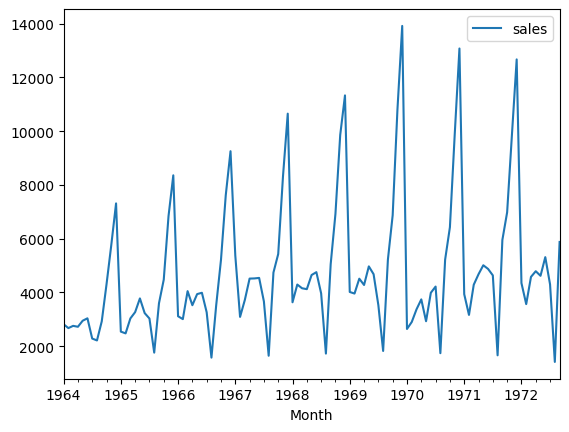

In [24]:
data.plot();

In [26]:
Ntest = 12

train, test = data.iloc[:-Ntest], data.iloc[-Ntest:]
train_index = data.index <= train.index[-1]
test_index = data.index > train.index[-1]

In [27]:
holtwinters = ExponentialSmoothing(train["sales"],
                                   initialization_method="legacy-heuristic",
                                   trend="add", seasonal="add", seasonal_periods=12)
holtwinters = holtwinters.fit()

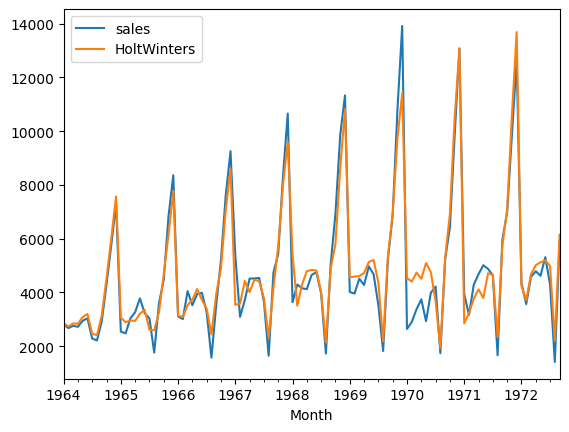

In [29]:
data.loc[train_index, "HoltWinters"] = holtwinters.fittedvalues
data.loc[test_index, "HoltWinters"] = holtwinters.forecast(Ntest)
data.plot();

In [30]:
r2 = r2_score(test["sales"], holtwinters.forecast(Ntest))
r2

0.9680340910154467

In [32]:
r2 = r2_score(train["sales"], holtwinters.fittedvalues)
r2

0.9169984903500262